In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

notebook_path = os.getcwd()

In [103]:
def load_csv_as_augmented(csv_path):
    assert os.path.exists(csv_path), "File not exists, "+ csv_path
    df=pd.read_csv(csv_path)
    print(df.columns)
    d=np.array(df)[:,1:]
    x=d[:,:-1]
    x_aug=np.hstack((np.ones((x.shape[0],1)),x))
    y=d[:,-1]
    print(f"x_aug.shape: {x_aug.shape}, y.shape: {y.shape}")
    return x_aug,y

In [104]:
def multiple_linear_regression(x,w):
    y_hat=0
    for xi,wi in zip(x.T,w):
        y_hat+=xi*wi
    return y_hat

In [105]:
def fn_mae(y_hat,y):
    return np.mean(np.abs(y_hat-y))
def fn_mse(y_hat,y):
    return np.mean((y_hat-y)**2)
def fn_rmse(y_hat,y):
    return np.sqrt(fn_mse(y_hat,y))
def fn_r2(y_hat,y):
    r2=1-np.sum((y_hat-y)**2)/np.sum((y.mean()-y)**2)
    return r2

In [106]:
def use_grad_mse(x,y,y_hat,w,eta):
    for i in range(w.shape[0]):
        # print(i)
        g = 2 * np.mean(x[:, i] * (y_hat - y))
        w[i] -= eta*g
    return w

In [107]:
def gradient_decent(x, y, eta, epochs):
    e_mae_list = []
    e_mse_list = []
    w = np.random.random(x.shape[1])
    for epoch in range(epochs):
        y_hat = multiple_linear_regression(x, w)

        e_mae = fn_mae(y_hat, y)
        e_mae_list.append(e_mae)

        e_mse = fn_mse(y_hat, y)
        e_mse_list.append(e_mse)

        if epoch % 100 == 0 or epoch < 10 or epoch > epochs - 10:
            print(f"epoch {epoch},\tE_MAE:{e_mae:.4f},\tE_MSE:{e_mse:.4f}")

        # loss function MSE
        w = use_grad_mse(x, y, y_hat, w, eta)
    y_hat = multiple_linear_regression(x, w)
    e_mae = fn_mae(y_hat, y)
    e_mae_list.append(e_mae)

    e_mse = fn_mse(y_hat, y)
    e_mse_list.append(e_mse)

    print(f"Final \tE_MAE:{e_mae:.4f},\tE_MSE:{e_mse:.4f}")
    info = {
        "weights": w,  # Not necessary
        "last_e_mae": e_mae,
        "e_mae_list": e_mae_list,
        "last_e_mse": e_mse,
        "e_mse_list": e_mse_list,
    }
    return w, info

In [108]:
# load data

# usa-housing_data
csv_train_path = f"{notebook_path}/usa-housing_data/usa-housing-train-preprocessed.csv"
csv_test_path = f"{notebook_path}/usa-housing_data/usa-housing-test-preprocessed.csv"

# simple_one_feature
# csv_train_path = (
#     f"{notebook_path}/test_data/simple_one_feature_housing-train-preprocessed.csv"
# )
# csv_test_path = (
#     f"{notebook_path}/test_data/simple_one_feature_housing-test-preprocessed.csv"
# )

print("train: ", end="\t")
x_aug_train, y_train = load_csv_as_augmented(csv_train_path)

print("\ntest: ", end="\t")
x_aug_test, y_test = load_csv_as_augmented(csv_test_path)

train: 	Index(['Unnamed: 0', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price'],
      dtype='object')
x_aug.shape: (3500, 6), y.shape: (3500,)

test: 	Index(['Unnamed: 0', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price'],
      dtype='object')
x_aug.shape: (1500, 6), y.shape: (1500,)


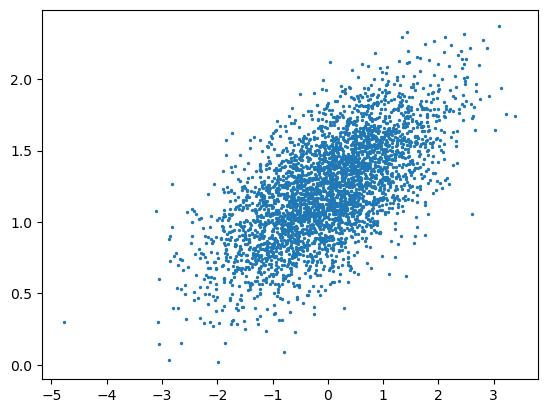

In [109]:
# Visualize
# plt.scatter(x_aug_train[:,0],y_train)
plt.scatter(x_aug_train[:, 1], y_train,s=2)
# plt.scatter(x_aug_train[:,2],y_train)
# ...

In [110]:
# For test
w = np.random.random(x_aug_train.shape[1])
y_hat_train_no_trained = multiple_linear_regression(x_aug_train, w)
print(f"y_hat_train_no_trained.shape: {y_hat_train_no_trained.shape}")
print(f"MAE: {fn_mae(y_hat_train_no_trained,y_train):.4f}")
print(f"MSE: {fn_mse(y_hat_train_no_trained,y_train):.4f}")

y_hat_train_no_trained.shape: (3500,)
MAE: 0.7609
MSE: 0.8075


In [111]:
# Training
epochs = 500
eta = 0.1

weights, info = gradient_decent(x_aug_train, y_train, eta, epochs)

print(f"weights: {weights}")
print(f"Error MAE on train: {info["last_e_mae"]:.4f}")
print(f"Error MSE on train: {info["last_e_mse"]:.4f}")

epoch 0,	E_MAE:0.9794,	E_MSE:1.4292
epoch 1,	E_MAE:0.7814,	E_MSE:0.9084
epoch 2,	E_MAE:0.6249,	E_MSE:0.5803
epoch 3,	E_MAE:0.5009,	E_MSE:0.3729
epoch 4,	E_MAE:0.4028,	E_MSE:0.2415
epoch 5,	E_MAE:0.3255,	E_MSE:0.1580
epoch 6,	E_MAE:0.2647,	E_MSE:0.1049
epoch 7,	E_MAE:0.2173,	E_MSE:0.0710
epoch 8,	E_MAE:0.1805,	E_MSE:0.0494
epoch 9,	E_MAE:0.1527,	E_MSE:0.0355
epoch 100,	E_MAE:0.0815,	E_MSE:0.0103
epoch 200,	E_MAE:0.0815,	E_MSE:0.0103
epoch 300,	E_MAE:0.0815,	E_MSE:0.0103
epoch 400,	E_MAE:0.0815,	E_MSE:0.0103
epoch 491,	E_MAE:0.0815,	E_MSE:0.0103
epoch 492,	E_MAE:0.0815,	E_MSE:0.0103
epoch 493,	E_MAE:0.0815,	E_MSE:0.0103
epoch 494,	E_MAE:0.0815,	E_MSE:0.0103
epoch 495,	E_MAE:0.0815,	E_MSE:0.0103
epoch 496,	E_MAE:0.0815,	E_MSE:0.0103
epoch 497,	E_MAE:0.0815,	E_MSE:0.0103
epoch 498,	E_MAE:0.0815,	E_MSE:0.0103
epoch 499,	E_MAE:0.0815,	E_MSE:0.0103
Final 	E_MAE:0.0815,	E_MSE:0.0103
weights: [1.23127864 0.23046453 0.1641592  0.12051471 0.00291362 0.15101936]
Error MAE on train: 0.0815
Error MS

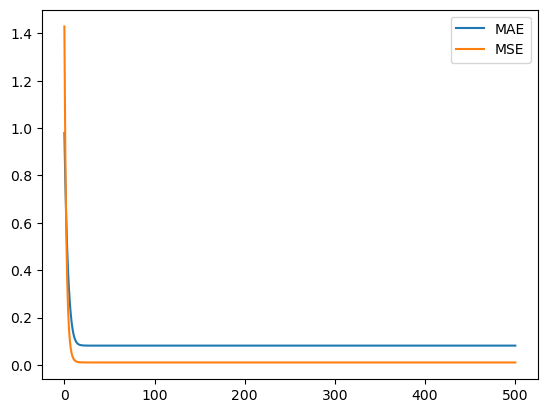

In [112]:
# Plot learning ...TODO Complete this comment
plt.plot(info["e_mae_list"], label="MAE")
plt.plot(info["e_mse_list"], label="MSE")
plt.legend()

In [113]:
# Testing
y_hat_train = multiple_linear_regression(x_aug_train, weights)
print(f"Error MAE on train: \t{fn_mae(y_hat_train,y_train):.4f}")
print(f"Error MSE on train: \t{fn_mse(y_hat_train,y_train):.4f}")
print(f"Error RMSE on train: \t{fn_rmse(y_hat_train,y_train):.4f}")
print(f"Error R2 on train: \t{fn_r2(y_hat_train,y_train):.4f}")
print()
y_hat_test = multiple_linear_regression(x_aug_test, weights)
print(f"Error MAE on test: \t{fn_mae(y_hat_test,y_test):.4f}")
print(f"Error MSE on test: \t{fn_mse(y_hat_test,y_test):.4f}")
print(f"Error RMSE on test: \t{fn_rmse(y_hat_test,y_test):.4f}")
print(f"Error R2 on test: \t{fn_r2(y_hat_test,y_test):.4f}")

Error MAE on train: 	0.0815
Error MSE on train: 	0.0103
Error RMSE on train: 	0.1014
Error R2 on train: 	0.9193

Error MAE on test: 	0.0811
Error MSE on test: 	0.0101
Error RMSE on test: 	0.1003
Error R2 on test: 	0.9147


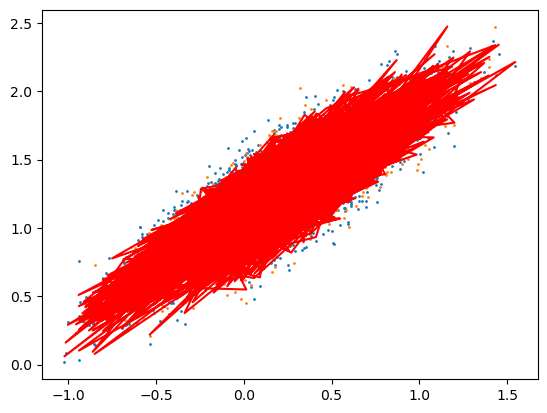

In [114]:
# Visualize using mean of data
# Best result on simple data
simple_x_train = np.mean(x_aug_train, axis=1)
simple_x_test = np.mean(x_aug_test, axis=1)
plt.scatter(simple_x_train, y_train, s=1)
plt.scatter(simple_x_test, y_test, s=1)

x_aug_total = np.vstack((x_aug_train, x_aug_test))
simple_x_total = np.mean(x_aug_total, axis=1)
y_hat_total = multiple_linear_regression(x_aug_total, weights)

plt.plot(simple_x_total, y_hat_total, c="red")